##  Лабораторная работа № 9 по теме: "Распознавание рукописных цифр"
    Цель работы: решение задачи классификации рукописных цифр.
    Исходные данные: DataSet MNIST + подготовленные изображения.
    Набор данных для обучения содержит 60000 черно-белых изображений размером 28x28, на каждом из которых изображена одна 
    цифра (от 0 до 9).
    Набор данных для проверки содержит 10000 изображений, которые аналогичны изображениям из набора данных для обучения.
    Набор подготовленных изображений состоит из 60 черно-белых изображений размером 28x28, на каждом из которых изображена одна 
    цифра (от 0 до 9).
### Исходные данные
#### MNIST

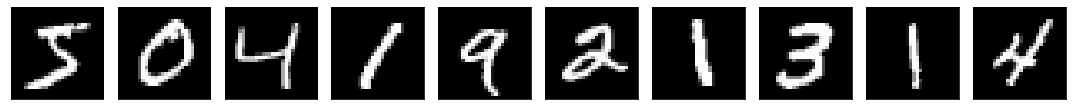

In [4]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    num=i+1    
    ax = fig.add_subplot(2,10,num)
    ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

#### Подготовленные изображения

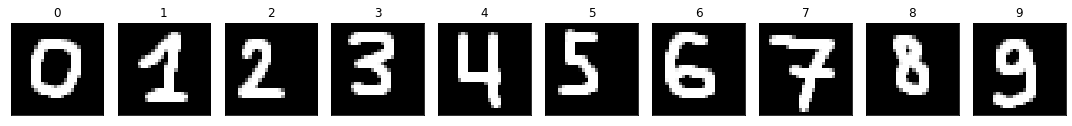

In [15]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    img_path = 'digits/Алещенко/' + str(i) + '.png'
    img0 = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray0 = cv2.cvtColor(img0 , cv2.COLOR_BGR2GRAY)
    resized0 = cv2.resize(gray0, (28, 28), interpolation = cv2.INTER_AREA)
    rsz0_norm = cv2.normalize(gray0, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    rsz0_norm = resized0/255
    rsz0 = 1 - rsz0_norm
    
    ax = fig.add_subplot(2,10,i+1)
    ax.set_title(i)
    ax.imshow(rsz0, cmap = 'gray')

    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

### Создание перцептрона

In [24]:
model=models.Sequential()
model.add(layers.Dense(784,input_shape=(784,),activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

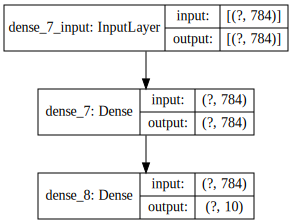

In [25]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg'))

### Обучение модели

In [24]:
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2464 - accuracy: 0.9284 - val_loss: 0.1265 - val_accuracy: 0.9630
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0969 - accuracy: 0.9713 - val_loss: 0.0852 - val_accuracy: 0.9737
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9819 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.9876 - val_loss: 0.0640 - val_accuracy: 0.9795
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0682 - val_accuracy: 0.9783
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0587 - val_accuracy: 0.9816
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.9956 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 

### Тестирование модели

In [64]:
import os
import re

counter = 0

for dirpath, dirnames, filenames in os.walk("digits"):
    for filename in filenames:
        img_path = os.path.join(dirpath, filename)
        digit = re.findall('(\d+)', img_path)
    
        img0 = cv2.imread(img_path, cv2.IMREAD_COLOR)
        gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
        resized0 = cv2.resize(gray0, (28, 28), interpolation = cv2.INTER_AREA)
        rsz0_norm = cv2.normalize(resized0, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
        rsz0_norm = resized0/255
        rsz0 = 1 - rsz0_norm
        
        img_fin = rsz0.reshape(1,784)
        y = model.predict_classes(img_fin)
        if digit[0] == str(y[0]):
            counter += 1    

In [65]:
counter*100/60

56.666666666666664

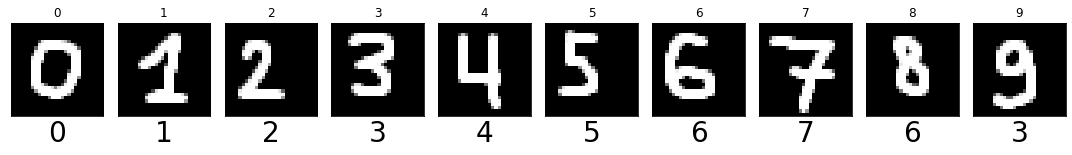

In [56]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    img_path = 'digits/Алещенко/' + str(i) + '.png'
    img0 = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    resized0 = cv2.resize(gray0, (28, 28), interpolation = cv2.INTER_AREA)
    rsz0_norm = cv2.normalize(resized0, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    rsz0_norm = resized0/255
    rsz0 = 1 - rsz0_norm
    
    ax = fig.add_subplot(2,10,i+1)
    ax.set_title(i)
    ax.imshow(rsz0, cmap = 'gray')
    
    img_fin = rsz0.reshape(1,784)
    y = model.predict_classes(img_fin)
    plt.xlabel (y[0], fontsize = 28)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

#### Модель показала высокую точность на валидационной выборке. На подготовленных цифрах точность составила 56% .

### Создание сверточной нейронная сеть

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size = (2,2)))   
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

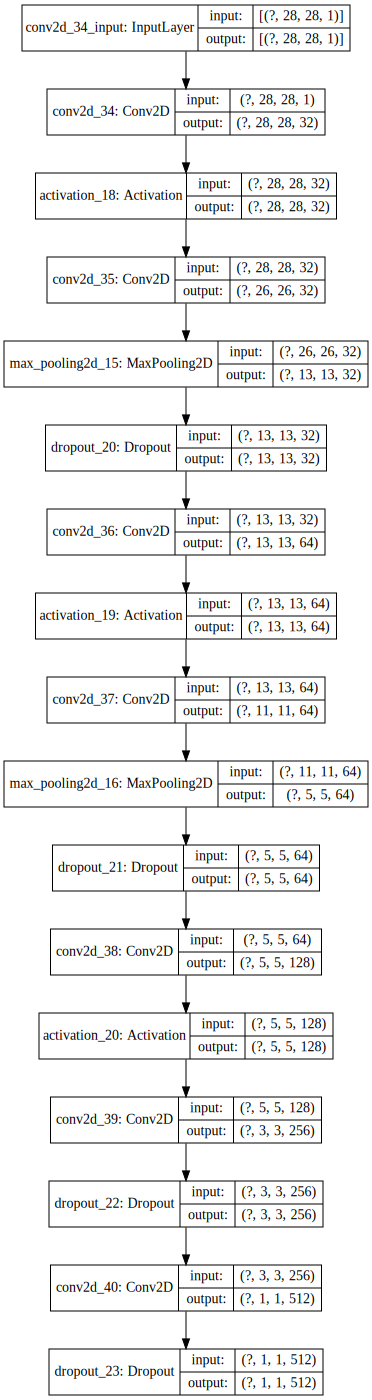

In [34]:
SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg'))

### Обучение модели

In [84]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2022 - accuracy: 0.9361 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 2/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0653 - accuracy: 0.9816 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 3/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0530 - accuracy: 0.9854 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 4/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0463 - accuracy: 0.9869 - val_loss: 0.0275 - val_accuracy: 0.9922
Epoch 5/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0391 - accuracy: 0.9892 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 6/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0385 - accuracy: 0.9893 - val_loss: 0.0272 - val_accuracy: 0.9936
Epoch 7/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.0267 -

### Тестирование модели

In [85]:
import os
import re

counter = 0

for dirpath, dirnames, filenames in os.walk("digits"):
    for filename in filenames:
        img_path = os.path.join(dirpath, filename)
        digit = re.findall('(\d+)', img_path)
    
        img0 = cv2.imread(img_path, cv2.IMREAD_COLOR)
        gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
        resized0 = cv2.resize(gray0, (28, 28), interpolation = cv2.INTER_AREA)
        rsz0_norm = cv2.normalize(resized0, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
        rsz0_norm = resized0/255
        rsz0 = 1 - rsz0_norm
        
        img_fin  = rsz0.reshape(-1,28,28,1)
        y = model.predict_classes(img_fin)
        if digit[0] == str(y[0]):
            counter += 1   

In [86]:
counter*100/60

81.66666666666667

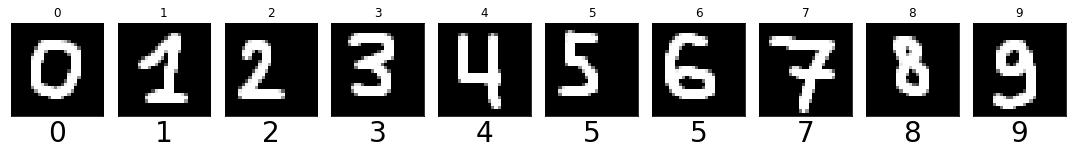

In [89]:
fig = plt.figure(figsize=(15,4))

for i in range(10):
    img_path = 'digits/Алещенко/' + str(i) + '.png'
    img0 = cv2.imread(img_path, cv2.IMREAD_COLOR)
    gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    resized0 = cv2.resize(gray0, (28, 28), interpolation = cv2.INTER_AREA)
    rsz0_norm = cv2.normalize(resized0, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    rsz0_norm = resized0/255
    rsz0 = 1 - rsz0_norm
    
    ax = fig.add_subplot(2,10,i+1)
    ax.set_title(i)
    ax.imshow(rsz0, cmap = 'gray')
    
    img_fin = rsz0.reshape(-1,28,28,1)
    y = model.predict_classes(img_fin)
    plt.xlabel (y[0], fontsize = 28)
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

### Вывод:
    Использование сверточной нейросети с 7 сверточными слоями позволило увеличить точность на подготовленных цифрах до 81.1%. Также точность немного увеличилась на 
    валидационном наборе данных и составила 99,2%.

## Список литературы:
* Сверточные нейронные сети в TensorFlow: [https://python-school.ru/blog/cnn-in-tensorflow/](https://python-school.ru/blog/cnn-in-tensorflow/)
* Машинное зрение на Python. Обучаем нейросеть распознавать цифры: [https://medium.com/@enduranceprog/machine-vision-digits-94eb258c6ff8](https://medium.com/@enduranceprog/machine-vision-digits-94eb258c6ff8)